Hunter S. DiCicco

DS440-002: Data Science Capstone

Dr. Rigas, for Drs. Niki and Paris Von Lockette

# Exploratory Data Analysis
## Round 1: Initial impressions, Problem Areas

In [1]:
import itertools
import datetime

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
print(f"Last Updated On: {datetime.datetime.now()!s}")

Last Updated On: 2020-05-04 21:57:55.034504


In [3]:
czc = pd.read_csv("../project/volume/data/raw/czchar.csv",
                  skiprows=list(range(5)) + [7], # the first few rows contain human-readable title + informative paragraphs
                  header=1) # 0-indexed row 6 is the header

ipums = pd.read_stata('../project/volume/data/raw/ipums_met_arr_sch_100K.dta')

cityp = pd.read_csv("../project/volume/data/raw/us_patent_loc_data.csv")

In [4]:
ipums.head()

,year,metarea,metaread,met2013,race,multyear,datanum,serial,cbserial,hhwt,...,imputed_networth_1980,imputed_round_1980,matched_to_scf_1980,metro_dissimilarity_wb,metro_isolation_b,in_metro_seg,arrests,in_arrests,school_msa_dissimilarity,in_school_seg
0,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,856.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
1,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1086.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
2,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1094.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
3,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1338.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
4,1960.0,860.0,8600.0,NaN,1.0,NaN,2.0,2097.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,0.0,171.0,1.0,NaN,0.0


Some important notes on these features:

* Social Capital Index:  Standardized index combining measures of
    * voter turnout rates, 
    * fraction of people who return their census forms,
    * measures of participation in community organizations


* Gini: Under Income Inequality, [Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient); $G=\frac{A}{A+B}$ of the labeled areas below
    * computed using parents of children in the core sample
    * with income topcoded at \$100 million in 2012 dollars

<img src="../res/Gini_coefficient.png" alt="Gini Coefficient Visualization" width="400" style="background-color:#e2cb70;" align="left"/>

Gini appears to be a robust predictor – attempt to explain variance in innovation using Gini index?

In [5]:
ipums_num = ipums.select_dtypes([np.number])
ipums_num.describe()

,year,metarea,metaread,met2013,race,multyear,datanum,serial,cbserial,hhwt,...,imputed_networth_1980,imputed_round_1980,matched_to_scf_1980,metro_dissimilarity_wb,metro_isolation_b,in_metro_seg,arrests,in_arrests,school_msa_dissimilarity,in_school_seg
count,100000.000000,100000.000000,100000.00000,60158.000000,100000.000000,39281.000000,100000.000000,1.000000e+05,4.312900e+04,100000.000000,...,4.310000e+02,1113.000000,1113.000000,71031.000000,71031.000000,100000.000000,76886.000000,100000.000000,65051.000000,100000.000000
mean,1998.283270,461.522210,4615.63268,30729.450447,1.756540,2015.008706,2.761390,2.722954e+06,1.835229e+12,22.631150,...,2.251510e+05,3.462713,0.387242,65.589831,21.202597,0.710310,73109.311682,0.768860,63.875699,0.651450
std,18.949024,240.691278,2406.97095,10625.870835,1.763252,1.419846,1.880338,1.788489e+06,5.744108e+11,28.146234,...,3.613156e+05,1.000316,0.487339,13.909001,23.084878,0.453621,96899.079428,0.421564,13.788166,0.476514
min,1960.000000,4.000000,40.00000,0.000000,1.000000,2013.000000,1.000000,1.430000e+02,6.270000e+02,0.000000,...,-1.377100e+04,1.000000,0.000000,18.267599,0.090000,0.000000,0.000000,0.000000,12.519340,0.000000
25%,1980.000000,228.000000,2281.00000,19820.000000,1.000000,2014.000000,1.000000,1.024028e+06,2.013001e+12,7.820656,...,2.420970e+04,3.000000,0.000000,56.244148,5.826673,0.000000,13464.000000,1.000000,54.214546,0.000000
50%,2000.000000,512.000000,5120.00000,35620.000000,1.000000,2015.000000,2.000000,2.701482e+06,2.015000e+12,20.000000,...,7.070116e+04,4.000000,0.000000,67.042152,8.507121,1.000000,38488.000000,1.000000,66.072006,1.000000
75%,2017.000000,620.000000,6200.00000,36740.000000,1.000000,2016.000000,5.000000,4.137900e+06,2.016001e+12,22.000000,...,2.577753e+05,4.000000,1.000000,76.887886,36.157754,1.000000,101060.000000,1.000000,73.595000,1.000000
max,2017.000000,936.000000,9360.00000,49740.000000,9.000000,2017.000000,5.000000,6.859169e+06,2.017002e+12,703.000000,...,2.625900e+06,4.000000,1.000000,97.528165,89.934390,1.000000,554558.000000,1.000000,97.500000,1.000000


In [6]:
cityp.head()

,Unnamed: 0,appln_id,patent_office,filing_date,lat,lng,ctry_code,name_0,name_1,name_2,name_3,name_4,name_5,city,coord_source,source,type
0,1,2,EP,1992/12/02,37.9048,-122.2810,US,United States,California,Contra Costa,NaN,NaN,NaN,Contra Costa,geolocalization,1,continual
1,2,448,EP,2008/06/23,28.6293,-81.7555,US,United States,Florida,Lake,NaN,NaN,NaN,Lake,geolocalization,1,priority
2,3,693,EP,1986/11/24,42.5769,-71.0674,US,United States,Massachusetts,Middlesex,NaN,NaN,NaN,Middlesex,geolocalization,1,priority
3,4,1028,EP,2007/01/09,28.5951,-81.2298,US,United States,Florida,Orange,NaN,NaN,NaN,Orange,geolocalization,1,single
4,5,1225,EP,1995/03/07,42.2735,-71.0202,US,United States,Massachusetts,Norfolk,NaN,NaN,NaN,Norfolk,geolocalization,1,continual


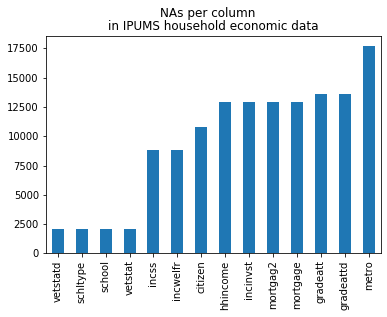

In [7]:
ipna = pd.isna(ipums_num).sum()
ipna = ipna[[i for i in ipna.axes[0]
             if 'imputed' not in i]]
ipna = ipna[ipna>0].sort_values(ascending=True)
ipna = ipna[ipna<2e4]
ipna[:40].plot(kind='bar',
               title='in IPUMS household economic data')
plt.suptitle('NAs per column');

ipna = ipna.axes[0]

In [8]:
ipumsA = ipums[ipna].dropna()
ipumsA.to_csv("../project/volume/data/interim/ipums_filtered.csv")
features = ipna.drop("hhincome")
target = 'hhincome'
x = ipumsA.loc[:, features]
y = ipumsA.loc[:, [target]]
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
pc = pca.fit_transform(x)
cols = ['PC' + str(i+1) for i in range(pca.n_components)]
pcdf = pd.DataFrame(data=pc, columns=cols)
pcdf.to_csv(f"../project/volume/data/interim/ipums_PCA{pca.n_components!s}.csv")
pcdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.565618,-0.657105,1.230984,-0.948448,0.381922,-0.501787,-0.645885,-0.515761,-0.433342,-0.020015
1,-1.565618,-0.657105,1.230984,-0.948448,0.381922,-0.501787,-0.645885,-0.515761,-0.433342,-0.020015
2,-1.533665,-0.656803,1.896606,-0.756914,0.388583,-0.542271,-0.700803,0.167370,-0.450949,-0.012799
3,-1.657618,-0.626147,-0.924130,-1.426303,0.346504,-0.563834,-0.574195,0.330327,-0.443268,-0.026711
4,5.344702,0.128152,0.886574,-0.790706,0.619466,0.230038,-0.746846,-0.502964,0.048219,0.013239


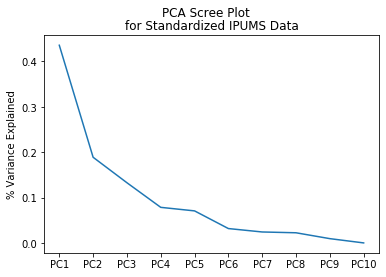

In [9]:
g = sns.lineplot(range(pca.n_components),
                 pca.explained_variance_ratio_,
                 markers=True)
plt.suptitle("PCA Scree Plot")
plt.title("for Standardized IPUMS Data")
plt.ylabel("% Variance Explained")
plt.xticks(range(pca.n_components))
g.set_xticklabels(cols);

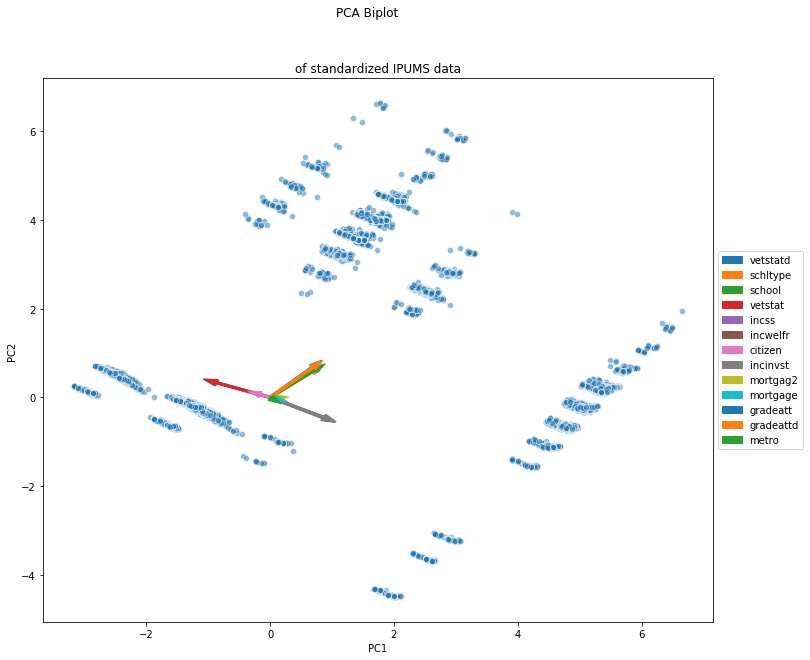

In [10]:
pc2 = pc[:,0:2]
cols = ['PC' + str(i+1) for i in range(pca.n_components)]
pc2 = pd.DataFrame(data=pc2, columns=cols[:2])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(pc2['PC1'], pc2['PC2'], alpha=0.5,
               ax=ax);
plt.suptitle("PCA Biplot")
plt.title('of standardized IPUMS data')

arrows = []
for i, j in enumerate(loadings):
    arrows.append(ax.arrow(0,0,j[0], j[1],
                            width=0.05,
                            label=features[i],
                            color='C'+str(i))
                 )
plt.legend(arrows, features, loc='center left', bbox_to_anchor=(1.0, 0.5));

simpson's paradox: check if pairwise sums of loadings add up to any other loadings https://en.wikipedia.org/wiki/Simpson%27s_paradox#Vector_interpretation

In [38]:
loadingslabels = dict(zip(tuple(features), tuple(map(tuple, loadings))))

for i, pair in enumerate(tuple(itertools.combinations(features, 2))):
    feature1, feature2 = pair[0], pair[1]
    loadingadd = loadingslabels[feature1] + loadingslabels[feature2]
    if loadingadd in loadingslabels.values():
        feature3 = features[i]
        print(f"{feature1} + {feature2} = {feature3} !!!")

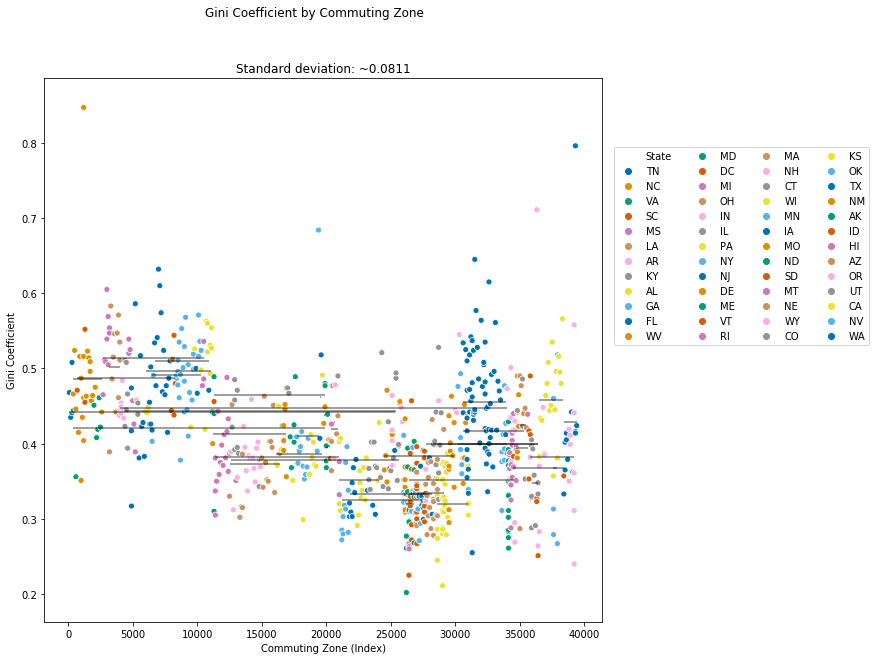

In [11]:
czc2 = czc.sort_values(axis=0, by=['CZ', 'State'])
groups = czc2.groupby(['State'])
means = groups['Gini'].mean().values
mincz = groups['CZ'].min().values
maxcz = groups['CZ'].max().values

fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="CZ", y="Gini", hue="State",
                     #legend=False,
                     data=czc2,
                     palette=sns.color_palette("colorblind", len(set(czc2['State']))));
ax.legend(loc='lower center', bbox_to_anchor=(1.25, 0.5), ncol=4)
plt.hlines(means, mincz, maxcz, alpha=0.5)
plt.xlabel("Commuting Zone (Index)");
plt.ylabel("Gini Coefficient");
plt.suptitle("Gini Coefficient by Commuting Zone");
plt.title(f"Standard deviation: ~{np.round(np.std(czc2['Gini']), 4)!s}");

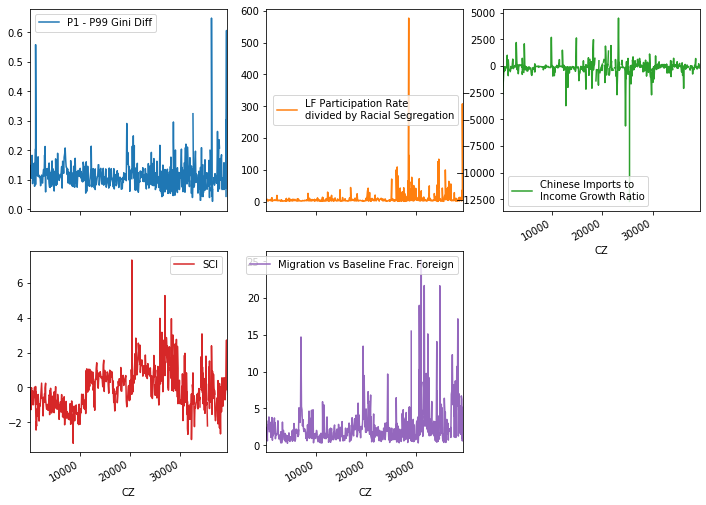

In [12]:
czc2['gini diff'] = czc2['Gini'] - czc2['Gini Bottom 99%']
czc2['gini diff'].apply(np.abs)
czc2['lfpr/rs'] = czc2['Labor Force Participation Rate']/czc2['Racial Segregation']
czc2['chi/inc'] = czc2['Growth in Chinese Imports 1990-2000']/czc2['Income Growth 2000-2006/10']
czc2['migration diff'] = czc2['Frac. Foreign Born']/czc2['Migration Outlflow Rate']

pairs = czc2.groupby('CZ')

ax = czc2.plot.line('CZ',
                    ['gini diff',
                     'lfpr/rs',
                     'chi/inc',
                     'Social Capital Index',
                     'migration diff'],
                    subplots=True, layout=(3,3),
                    #legend='reverse',
                    figsize=(12,14),
                    label=('P1 - P99 Gini Diff',
                           'LF Participation Rate\ndivided by Racial Segregation',
                           'Chinese Imports to\nIncome Growth Ratio',
                           'SCI',
                           'Migration vs Baseline Frac. Foreign')
              );

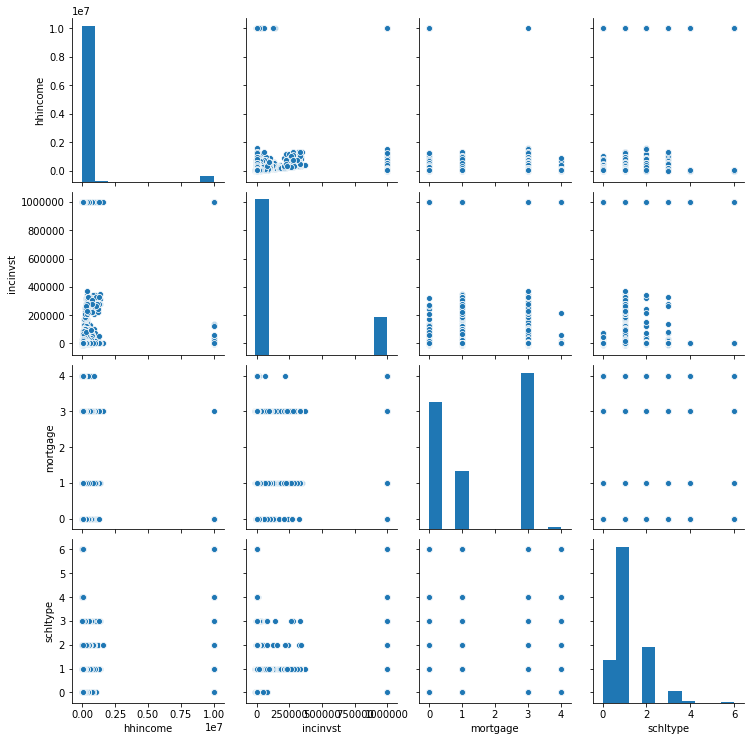

In [13]:
sns.pairplot(ipumsA[['hhincome', 'incinvst', 'mortgage', 'schltype']]);